In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('fma_metadata/echonest.csv')

In [39]:
data.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,track_id
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,2.0
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,3.0
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,5.0
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,10.0
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,134.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14511 entries, 0 to 14510
Data columns (total 9 columns):
acousticness        13129 non-null float64
danceability        13129 non-null float64
energy              13129 non-null float64
instrumentalness    13129 non-null float64
liveness            13129 non-null float64
speechiness         13129 non-null float64
tempo               13129 non-null float64
valence             13129 non-null float64
track_id            13129 non-null float64
dtypes: float64(9)
memory usage: 1020.4 KB


In [51]:
data.dropna(inplace=True)

In [55]:
tracks = pd.read_csv('fma_metadata/tracks_dataset.csv')

/Users/saifkazi/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,1,2,6,7,12,15,16,17,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
tracks = tracks[['track_id','genre_top']]

In [59]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136641 entries, 0 to 136640
Data columns (total 2 columns):
track_id     136553 non-null object
genre_top    49638 non-null object
dtypes: object(2)
memory usage: 2.1+ MB


In [83]:
df = pd.merge(data,tracks,how='left',on='track_id')

In [84]:
df1 = df[df['genre_top'].isnull()==False]

In [94]:
genre_labels = list(df1['genre_top'].unique())

In [97]:
genres = dict()
for i,genre in enumerate(genre_labels):
    genres[genre] = i

In [98]:
genres

{'Hip-Hop': 0,
 'Jazz': 1,
 'Rock': 2,
 'Electronic': 3,
 'Instrumental': 4,
 'Classical': 5,
 'Folk': 6,
 'Blues': 7,
 'Pop': 8,
 'International': 9,
 'Old-Time / Historic': 10}

In [101]:
df1['genre_top']=df1['genre_top'].map(genres)

/Users/saifkazi/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df1.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,track_id,genre_top
3710,0.995649,0.394599,0.089494,0.883401,0.146451,0.039721,109.461,0.068221,14051,0
3711,0.010028,0.674203,0.680239,0.914485,0.299501,0.440051,119.964,0.249854,14052,0
3712,0.335639,0.483271,0.895392,0.532255,0.132961,0.039678,182.014,0.541889,14053,1
3713,0.622499,0.692986,0.661026,0.905211,0.313500,0.027691,109.962,0.800987,14054,1
3714,0.013479,0.577701,0.844099,0.527882,0.096912,0.040110,143.983,0.116108,14055,1


In [103]:
df1['genre_top'].value_counts()

2     854
3     655
10    273
0     264
6     123
1      80
5      77
8      56
4      33
7      20
9      19
Name: genre_top, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [140]:
X = df1.drop(['track_id','genre_top'],axis=1)
y = df1['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [141]:
error_rates = list()
for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    error_rates.append(np.mean(y_test!=predictions))

Text(0, 0.5, 'Error rates')

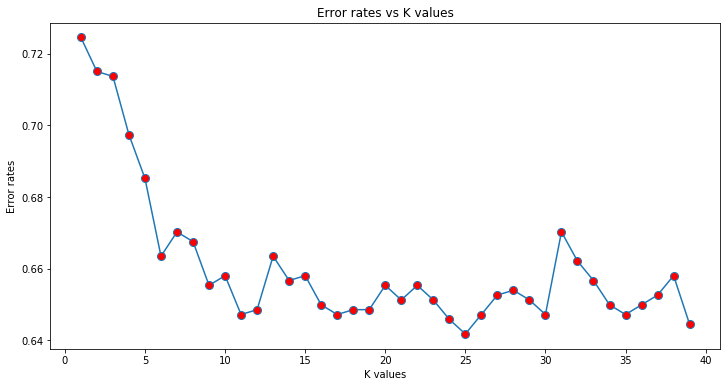

In [142]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rates,marker='o',markersize=8,markerfacecolor='red')
plt.title('Error rates vs K values')
plt.xlabel('K values')
plt.ylabel('Error rates')

In [143]:
knn = KNeighborsClassifier(25)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [144]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.14      0.03      0.04        75
           1       0.00      0.00      0.00        22
           2       0.39      0.73      0.51       267
           3       0.30      0.34      0.32       193
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         6
          10       0.25      0.01      0.02        81

    accuracy                           0.36       737
   macro avg       0.10      0.10      0.08       737
weighted avg       0.26      0.36      0.28       737



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
svm = SVC(decision_function_shape='ovo')

In [150]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
svm_pred = svm.predict(X_test)

In [152]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.00      0.00      0.00        22
           2       0.36      1.00      0.53       267
           3       0.00      0.00      0.00       193
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00        81

    accuracy                           0.36       737
   macro avg       0.03      0.09      0.05       737
weighted avg       0.13      0.36      0.19       737



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
